# EE4375: First Lab Session: Introduction to Julia, GMSH and Paraview

The **goal** of this first lab session is to introduce three software components required in the remainder of the course. These components are:
1. [Julia](http://www.julialang.org) as a programming language;
2. [GMSH](https://gmsh.info) as package for geometry handling and mesh generation;
3. [Paraview](https://www.paraview.org) as package for data visualization.

# Section 1: Introduction to Julia

## Section 1.1: Installation of Software and Packages
Please proceed as follows: 
- download and install [Jupyter](https://jupyterbook.org/en/stable/intro.html) locally on your laptop; 
- download and install [Julia](http://www.julialang.org) locally on your laptop; 
- start the Julia REPL to install [IJulia](https://julialang.github.io/IJulia.jl/stable/); 
- download this notebook from and run this notebookl with Jupyter; 
- install the Julia packages [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/), [Plots](https://docs.juliaplots.org/stable/), [BenchmarkTools](https://juliaci.github.io/BenchmarkTools.jl/stable/) and [WriteVTK](https://github.com/JuliaVTK/WriteVTK.jl); 

In [2]:
# type yes when prompted to install the software 
using LinearAlgebra

In [3]:
# type yes when prompted to install the software 
using Plots

In [4]:
# type yes when prompted to install the software 
using BenchmarkTools

In [5]:
# type yes when prompted to install the software 
using WriteVTK

## Section 2.1: Define a mesh on the interval 
Study code that follows. What is the size of the resulting vector x? Decrease the value of the meshwidth h (keeping xstart and xend fixed). Consult the documentation of the typeof() function. What is the type of x? Replace the Vector() function by an explicit for-loop. Plot x vs. x using various line styles. 

In [6]:
N = 10; 
h = 1/N;
xstart = 0. 
xend = 1.
x = Vector(xstart:h:xend)
display(x)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

##  Section 3.1: Define a source vector 
Study code that follows. What is the size of the resulting vector f? Decrease the value of the meshwidth h (keeping xstart and xend fixed). Plot f versus x. Try various values of mu and sigma. What is the type of sourceFct? Consult the documentation of the methods() function. Apply the methods function to sourceFct. Consult the documentation of the map() function. Replace the dot-syntax (referred to as broadcast in Julia) using the map() function. 

In [7]:
# define the so-called source function 
function sourceFct(x)
    mu = 0.3
    sigma = .1
    return exp( -(x-mu)^2/sigma^2)
end 

sourceFct (generic function with 1 method)

In [8]:
# apply the source to the previously defined vector. Observe the dot-syntax. 
f = sourceFct.(x)

11-element Vector{Float64}:
 0.00012340980408667978
 0.018315638888734203
 0.36787944117144256
 1.0
 0.36787944117144217
 0.01831563888873418
 0.00012340980408667978
 1.1253517471925971e-7
 1.388794386496407e-11
 2.319522830243569e-16
 5.242885663363538e-22

##  Section 4.1: Define a matrix 
Study code that follows. What is the size and type of the resulting vector A? Decrease the value of the meshwidth h. Contruct the matrix A using map to replace the for-loop. Consult the documentation the function Tridiagonal() in the LinearAlgebra package. Contruct the matrix A using the function Tridiagonal(). 

In [9]:
h2 = h*h;
Np1 = N+1; 
# initialize to zero matrix 
A = zeros(Np1,Np1)

# loop over rows and columns to set values of matrix A 
for i ∈ axes(A,1), j ∈ axes(A,2)
    if (i==j) A[i,j] = 2/h2 end 
    if ((i==j-1) || (i==j+1)) A[i,j] = -1/h2 end 
end

A

11×11 Matrix{Float64}:
  200.0  -100.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
 -100.0   200.0  -100.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0  -100.0   200.0  -100.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0  -100.0   200.0  -100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0  -100.0   200.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0  -100.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0      200.0  -100.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0   200.0  -100.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0  -100.0   200.0  -100.0
    0.0     0.0     0.0     0.0     0.0  …     0.0     0.0  -100.0   200.0

In [10]:
h2 = h*h;
Np1 = N+1; 
# initialize to zero matrix 
A = zeros(Np1,Np1)

# loop over rows and columns to set values of matrix A 
for i in axes(A,1), j in axes(A,2)
    if (i==j) A[i,j] = 2/h2 end 
    if ((i==j-1) || (i==j+1)) A[i,j] = -1/h2 end 
end

A

11×11 Matrix{Float64}:
  200.0  -100.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
 -100.0   200.0  -100.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0  -100.0   200.0  -100.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0  -100.0   200.0  -100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0  -100.0   200.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0  -100.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0      200.0  -100.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0   200.0  -100.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0  -100.0   200.0  -100.0
    0.0     0.0     0.0     0.0     0.0  …     0.0     0.0  -100.0   200.0

## Section 5.1: Perform a bit of Black Magic Explained Later in the Course 

In [11]:
# modify the first row of matrix A 
A[1,1] = 1; A[1,2] = 0; 
# modify the last row of matrix A 
A[end,end] = 1; A[end,end-1] = 0;  
A

11×11 Matrix{Float64}:
    1.0     0.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
 -100.0   200.0  -100.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0  -100.0   200.0  -100.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0  -100.0   200.0  -100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0  -100.0   200.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0  -100.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0      200.0  -100.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0     -100.0   200.0  -100.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0  -100.0   200.0  -100.0
    0.0     0.0     0.0     0.0     0.0  …     0.0     0.0     0.0     1.0

## Section 6.1: Solve a Linear System and Plot the Computed Solution
Study code that follows. Study how the linear systems is being solved. Consult the documentation of the lu() function. Perform the explicit LU-decompostioon of the matrix A. Extend the size of the system being solved. Extend the plotting function with labeling of axis, title and legend. Extend the plotting function to plot both f vs. x and u vs. x. Try various values of mu and sigma. Replace the monopole source function by a dipole source function.   

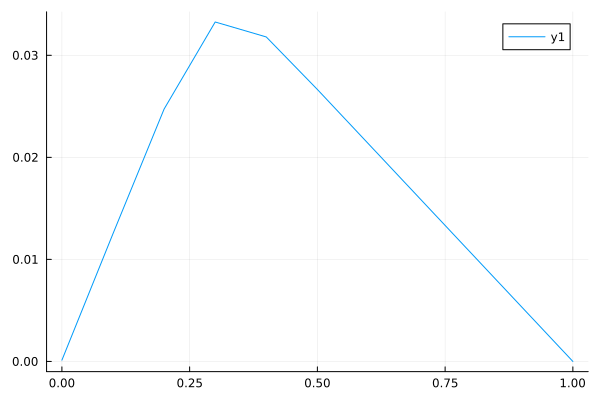

In [12]:
u  = A \ f
plot(x,u)

## Section 6.1: Write the computed solution to file 
The cell below write the solution to a file. Visualize the solution in paraview. 

In [13]:
# Create VTK file structure using x and u 
# vtkfile = vtk_grid("data", x; compress = false, append = true, ascii = true) do vtk 
vtkfile = vtk_grid("data/data", x,[0.],[0.]; compress = false, append = true, ascii = true) do vtk 
    vtk["solution"] = u 
end 

1-element Vector{String}:
 "data/data.vtr"

# Section 2: Introduction to GMSH

## Section 1.2: Introduction

[GMSH](https://gmsh.info) is a package for geometry definition and mesh generation. 

Tutorials on the use of GMSH are listed at [GMSH Julia Tutorials](https://gitlab.onelab.info/gmsh/gmsh/-/tree/master/tutorials/julia).

## Section 2.2: Installing GMSH as a Julia Package

Install GMSH as a Julia following the instructions provided at [GMSH.jl](https://github.com/JuliaFEM/Gmsh.jl). 

In case of difficulties on a Windows, proceed as described below. 

### Problem on Windows
Installing Gmsh.jl via the Pkg manager yields an error on Windows machines.
```
julia> using Pkg; Pkg.add("Gmsh")
ERROR: Error building `Gmsh`:
ERROR: LoadError: Your platform ("x86_64-w64-mingw32", parsed as "x86_64-w64-mingw32-gcc8-cxx11") is not supported by this package!
```

### Workaround
1. Download the Gmsh SDK from https://gmsh.info/ and unzip the contents.
2. Now, Gmsh can be used in Julia by executing
```
include("PATH_TO_SDK/lib/gmsh.jl")
```
where `PATH_TO_SDK` is the location where you unzipped the SDK files.
3. This is not ideal as permanent solution. To improve this, we can add the SDK /lib folder to Julia\'s `LOAD_PATH` and load it using the normal package inclusion methods. To do this, execute
```
push!(LOAD_PATH, "PATH_TO_SDK/lib")
using gmsh
```
4. To make this change permanent, the line
```
push!(LOAD_PATH, "PATH_TO_SDK/lib")
```
can be placed in the startup script located at `C:\Users\$user\.julia\config\startup.jl`. If this script is not present you can create it. Take care that the extension is `.jl` and not `.jl.txt`, which Windows is likely to do for you.
5. After making this change and restarting the Julia command prompt, you should be able to use
```
using gmsh
```
or
```
import gmsh
```
to use Gmsh as a package. Try this by executing one of the tutorial scripts in `PATH_TO_SDK\share\doc\gmsh\tutorials\julia`.

## Section 3.2: First Example - Tutorial t1.jl 
1. Study the [tutorial example t1.jl](https://gitlab.onelab.info/gmsh/gmsh/-/blob/master/tutorials/julia/t1.jl);  
2. Describe how geometry is generated using points, lines and surfaces; 
3. Describe how mesh is generated using mesh parameter setting and mesh generation; 

## Section 4.2: More Examples on geometry defintion and mesh generation 
Study the [tutorial example t2.jl](https://gitlab.onelab.info/gmsh/gmsh/-/blob/master/tutorials/julia/t2.jl), other geometries (circle, L-shape, square with boundary defined by a spline, geometry that changes by a script) or other GMSH tutorial examples of choice.  

## Section 5.2: Write the generated mesh to file
The cells that follows goes through the following steps: 
1. read a GMSH file from file (in this case the file square.msh); 
2. extract points and cells from the mesh; 
3. write the points and the cells to a file that can be read by paraview; 
This allows to visualize the mesh in paraview. It is instructive to study how points and cells are extracted from the mesh data structure. The alternative is to use the GMSH graphical users interface to visualize the mesh. 

In [14]:
try
    using Gmsh: gmsh
catch
    using gmsh
end

In [15]:
#..1/7: Initialize gmsh engine 
gmsh.initialize()

#..2/7: Read the mesh from file the mesh
gmsh.open("data/square.msh")

#..3/7: Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/7: Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..initialize elements 
elements = [zeros(Int, 3) for i in 1:nelements];
#..loop over elements and store data into elements     
for element_id in 1:nelements
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]
        
    # Store connectivity in a convenient format
    elements[element_id] = [node1_id, node2_id, node3_id]
end

#..5/7: Define nodes (points) and elements (cells)
#..The MeshCell data structure in provided by the WriteVTK.jl package   
points = [xnode ynode]';
cells = [MeshCell(VTKCellTypes.VTK_TRIANGLE, el) for el in elements];

#..6/7: Create VTK file structure using nodes and elements
vtkfile  = vtk_grid("data/mesh", points, cells);
outfiles = vtk_save(vtkfile);

#..7/7: Finalize gmsh engine 
gmsh.finalize()

Info    : Reading 'data/square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'data/square.msh'


## References